In [1]:
import pickle
import numpy as np
import collections
import matplotlib.pyplot as plt
import copy
from matplotlib import rc
rc('text', usetex=False)

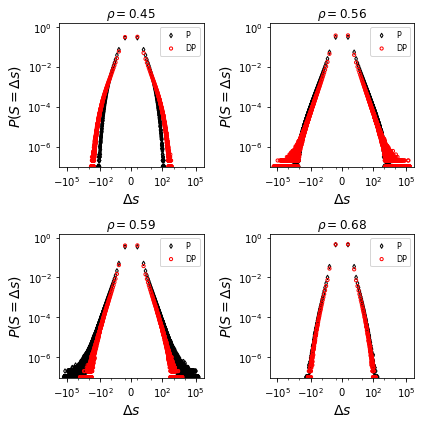

In [3]:
plt.figure(figsize=(6,6))

densities = [0.45,0.56,0.59,0.68]
grid_size = 1024
i = 1

for density in densities:
    replicates = [1,2,3,4,5]
    numbers_per_replicate = 2000000
    dpt = []
    npt = []
    for replicate in replicates:
        filename_dp = "dp_transformations_" + str(grid_size) + "_" + str(density) + "_" + str(numbers_per_replicate) + "_" + str(replicate) + ".txt"
        filename_np = "np_transformations_" + str(grid_size) + "_" + str(density) + "_" + str(numbers_per_replicate) + "_" + str(replicate) + ".txt"
        with open(filename_dp) as f:
            dpt.extend([tuple(map(int, i.split(' '))) for i in f])
        with open(filename_np) as f:
            npt.extend([tuple(map(int, i.split(' '))) for i in f])
    
    npscs = [(i[1]-i[0]) for i in npt]
    npsc_freqs = dict(collections.Counter(npscs))
    npsc_freqs = {k: v / (len(npscs)) for k, v in npsc_freqs.items()}

    dpscs = [(i[1]-i[0]) for i in dpt]
    dpsc_freqs = dict(collections.Counter(dpscs))
    dpsc_freqs = {k: v / (len(dpscs)) for k, v in dpsc_freqs.items()}

    np_lists = sorted(npsc_freqs.items()) 
    dp_lists = sorted(dpsc_freqs.items()) 

    npsc_x, npsc_y = zip(*np_lists)
    dpsc_x, dpsc_y = zip(*dp_lists)
    
    ax1 = plt.subplot(2,2,i)
    ax1.scatter(npsc_x, npsc_y,s=10,marker='d',label='P',color='black',facecolors='none')
    ax1.scatter(dpsc_x, dpsc_y,s=10,marker='o',label='DP',color='red',facecolors='none')
    ax1.set_xscale('symlog')
    ax1.set_yscale('log')
    ax1.set_ylim(9*10**(-8),1.5*10**(0))
    ax1.set_xlim(-5*10**(5),5*10**(5))
    ax1.set_xticks([-10**(5),-10**(2),0,10**(2),10**(5)])
    ax1.legend(fontsize=8)
    ax1.set_xlabel('$\Delta s$',fontsize=14)
    ax1.set_ylabel('$P (S=\Delta s)$',fontsize=14)
    ax1.set_title('$\\rho = $'+str(density))
    i += 1

plt.tight_layout()
#plt.savefig("Figure_2.png",dpi=300)